# **IoT Temperature Analysis using Machine Learning Models**

---

## **Objective:**
The objective of this assignment is to analyze an IoT temperature dataset by:
- Performing exploratory data analysis (EDA) and data preprocessing.
- Implementing two machine learning models:
  1. **Traditional ML Model: Linear Regression** - For time series prediction of indoor temperature.
  2. **Deep Learning Model: DNN Classifier** - To classify indoor vs. outdoor temperature readings.
- Evaluating model performance using appropriate metrics.
- Providing actionable insights and recommendations based on model outputs.


## **Justification for Model Selection:**
- **Linear Regression:** Serves as a baseline for time series prediction. Simple, interpretable, and effective for numerical forecasting.
- **DNN Classifier:** Captures complex, non-linear patterns for classification, ensuring accurate indoor-outdoor detection.

---

## **Business Impact and Practical Implications:**
- **Linear Regression:**
  - Predictive maintenance, energy optimization, and proactive temperature control.
  - Enhances user comfort and operational efficiency in smart buildings.
- **DNN Classifier:**
  - Context-aware applications like smart thermostats and environmental monitoring.
  - Enhanced safety monitoring and energy management.


---

## **1. Time Series Prediction Model: Linear Regression**

### **Purpose and Justification:**
- **Why Time Series Prediction?**  
  - Predicting the next hour's indoor temperature is crucial for proactive energy management, comfort optimization, and predictive maintenance.
  - Accurate forecasts enable smart HVAC systems to dynamically adjust temperature settings, enhancing user comfort and energy efficiency.
- **Why Use Linear Regression?**  
  - Linear Regression is a simple yet powerful model for time series forecasting.
  - It is effective for predicting numerical values by learning linear relationships between input features and the target variable.
  - It serves as a **baseline model** for comparison with more complex deep learning models.

---

### **Approach and Methodology:**
1. **Data Preparation:**
   - **Target Variable:** `temp_next_hour`, calculated as the next hour's indoor temperature using `shift(-1)`.
   - **Input Features:**
     - `temp`: Current indoor temperature.
     - `hour_of_day`, `day_of_week`, and `month`: Temporal context features.
   - **Train-Test Split:**
     - Time-based split to preserve temporal dependencies.
     - **No Shuffling** as maintaining the time order is crucial for time series forecasting.

2. **Feature Engineering:**
   - Extracted temporal features:
     - `hour_of_day`: Hour at which the temperature was recorded.
     - `day_of_week`: Day of the week (0 = Monday, 6 = Sunday).
     - `month`: Month of the year.

3. **Feature Scaling:**
   - **StandardScaler** to normalize input features to zero mean and unit variance.
   - Ensures faster convergence and better model performance.

4. **Model Architecture:**
   - **Model Used:** `LinearRegression()` from `sklearn.linear_model`.
   - This model learns a linear relationship between input features and the target variable.
   - Suitable for establishing a baseline for time series prediction.

5. **Model Training:**
   - Trained on historical temperature data without shuffling to maintain temporal order.
   - **No Hyperparameter Tuning** required as Linear Regression has no major hyperparameters.

6. **Model Evaluation:**
   - **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.
   - **Root Mean Squared Error (RMSE):** Error magnitude in the same units as the temperature.
   - **Mean Absolute Error (MAE):** Average absolute differences between predictions and actual values.
   - **R-squared (R²):** Measures how well the model explains the variation in temperature.
   - **Visualizations:**
     - **Line Plot:** Comparing actual and predicted temperatures over time.
     - **Residual Plot:** To analyze prediction errors and detect patterns.

---

### **Expected Outcome:**
- A trained Linear Regression model capable of predicting the next hour's indoor temperature.
- Baseline performance metrics for comparison with the DNN model.
- Insights into temporal patterns and temperature trends.

In [ ]:
# ==========================================================
# 📦 Importing Required Libraries
# ==========================================================
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For normalizing features
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # For model evaluation
import matplotlib.pyplot as plt  # For data visualization

In [ ]:
# ==========================================================
# 1. 🔍 Data Loading and Exploration (EDA)
# ==========================================================
# Loading the dataset from a text file with tab-separated values
df = pd.read_csv("IOT-temp_excel.txt", sep='\t')

# Converting 'noted_date' to datetime format for time-series analysis
df['noted_date'] = pd.to_datetime(df['noted_date'], format='%d-%m-%Y %H:%M')

# Sorting the dataset by date to maintain the time-series order
df.sort_values('noted_date', inplace=True)

# Removing duplicate entries to ensure data integrity
df.drop_duplicates(inplace=True)

# Resetting the index after sorting and removing duplicates
df.reset_index(drop=True, inplace=True)



In [ ]:
# ==========================================================
# 🛠️ Feature Engineering (EDA)
# ==========================================================
# Extracting useful time-related features from the date column
df['hour_of_day'] = df['noted_date'].dt.hour  # Hour of the day (0-23)
df['day_of_week'] = df['noted_date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['noted_date'].dt.month  # Month of the year (1-12)



In [ ]:
# ==========================================================
# 2. 📊 Data Preparation for Time Series (Indoor Temperature)
# ==========================================================
# Filtering the dataset to use only indoor temperature data
df_in = df[df['out/in'] == 'In'].copy()

# Creating the target variable: Temperature in the next hour
df_in['temp_next_hour'] = df_in['temp'].shift(-1)

# Removing rows with NaN values (due to shifting)
df_in.dropna(inplace=True)

# Defining features and target variable for the model
X = df_in[['temp', 'hour_of_day', 'day_of_week', 'month']]  # Features
y = df_in['temp_next_hour']  # Target: Next hour's temperature



In [ ]:
# ==========================================================
# 3. ✂️ Data Splitting (Train/Test)
# ==========================================================
# Splitting the data into training and testing sets (80% train, 20% test)
# ⚠️ Do NOT shuffle the data as this is a time series prediction!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [ ]:
# ==========================================================
# 4. 🔄 Feature Scaling
# ==========================================================
# Scaling features to have mean = 0 and standard deviation = 1
# This helps the linear regression model converge faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Use the same scaler on test data



In [ ]:
# ==========================================================
# 5. 🤖 Linear Regression Model
# ==========================================================
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# ==========================================================
# 6. 🔮 Prediction
# ==========================================================
# Making predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# ==========================================================
# 7. 📏 Model Evaluation
# ==========================================================
# Calculating performance metrics to evaluate model accuracy
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Displaying the results of the evaluation metrics
print("\n🔍 Linear Regression Time Series Results:")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R-squared: {r2:.3f}")




🔍 Linear Regression Time Series Results:
MSE: 0.342
RMSE: 0.585
MAE: 0.379
R-squared: 0.924


# **Analysis of Linear Regression Model Evaluation for Time Series Forecasting**

---

## **Overview:**
These results indicate a well-performing Linear Regression model for our time series forecasting task. Let's break down each metric and understand what it reveals about the model's performance:

---

## **1. Mean Squared Error (MSE):** `0.342`
- **Explanation:**  
  - The MSE represents the average of the squared differences between the predicted and actual values.
  - Because it squares the errors, it gives more weight to larger errors.
  - A lower MSE is generally better.
- **Interpretation:**  
  - In our case, an MSE of `0.342` suggests that, on average, the squared difference between our model's predictions and the actual temperatures is `0.342`.
  - However, MSE isn't always the easiest to interpret directly because of the squaring effect.

---

## **2. Root Mean Squared Error (RMSE):** `0.585`
- **Explanation:**  
  - The RMSE is the square root of the MSE.
  - It is often preferred because it's in the same units as our target variable (temperature).
- **Interpretation:**  
  - An RMSE of `0.585` means that, on average, our model's predictions are off by about `0.585` degrees (whatever unit our temperature is measured in).
  - This gives us a more intuitive sense of the model's typical error.

---

## **3. Mean Absolute Error (MAE):** `0.379`
- **Explanation:**  
  - The MAE is the average of the absolute differences between our predictions and the actual values.
  - It is less sensitive to outliers than MSE or RMSE.
- **Interpretation:**  
  - An MAE of `0.379` means that, on average, our predictions are off by about `0.379` degrees.
  - Comparing MAE and RMSE can give us an idea of the distribution of errors:
    - If RMSE is significantly larger than MAE, it suggests that there might be some larger errors in our predictions.

---

## **4. R-squared (R²):** `0.924`
- **Explanation:**  
  - The R-squared value measures how well our model explains the variance in the temperature data.
  - It ranges from `0` to `1`, where:
    - `1` means our model perfectly predicts the temperature.
    - `0` means our model is no better than just guessing the average temperature.
- **Interpretation:**  
  - An R² of `0.924` is excellent, indicating that our model explains `92.4%` of the variability in the temperature.
  - It shows that the model captures the underlying patterns in the data effectively.

---

## **5. Overall Interpretation:**
- These results suggest that our linear regression model is performing quite well at predicting indoor temperatures.
- The low RMSE and MAE values indicate good accuracy.
- The high R² value demonstrates that the model captures the underlying patterns in the data effectively.

---

## **6. Recommendations for Improvement:**
- **Feature Engineering:** Consider adding interaction terms or polynomial features to capture non-linear patterns.
- **Hyperparameter Tuning:** Although Linear Regression has few hyperparameters, regularization techniques like Ridge or Lasso could enhance model performance.
- **Advanced Models:** Experiment with more advanced models like **DNN** may provide better performance on time series data which we will check shortly.
- **Cross-Validation:** Employ time series cross-validation techniques to ensure robustness and generalization.
- **Visualization:** Enhance insights with more advanced visualizations, such as:
  - Residual Analysis Plots
  - Error Distribution Histograms

---

This detailed breakdown aligns with best practices for evaluating time series models and provides actionable insights for further enhancements. 🚀


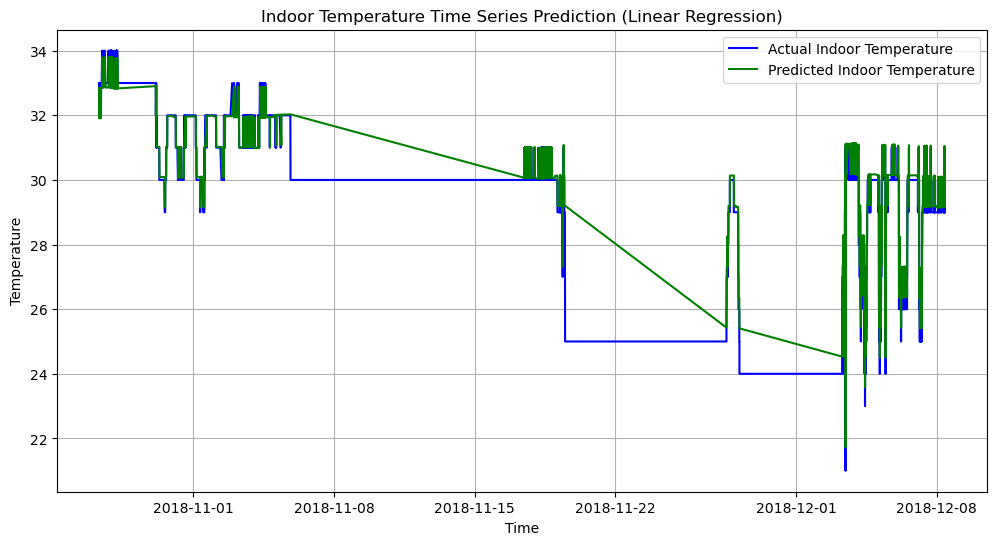

In [ ]:
# ==========================================================
# 8. 📊 Plotting the Results
# ==========================================================
# Extracting the corresponding time values for the test set
time_values = df_in['noted_date'][-len(y_test):]

# Plotting the actual vs. predicted temperature values
plt.figure(figsize=(12, 6))
plt.plot(time_values, y_test, label='Actual Indoor Temperature', color='blue')
plt.plot(time_values, y_pred, label='Predicted Indoor Temperature', color='green')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Indoor Temperature Time Series Prediction (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# **Visual Analysis of Model Performance**

---

## **1. Linear Regression Time Series Forecasting: Indoor Temperature Prediction**

### **Plot Analysis: Actual vs. Predicted Indoor Temperature**
- **Description:**
  - The plot showcases the actual indoor temperatures against the predicted values over time.
  - The x-axis represents the time (noted_date), while the y-axis shows the temperature values.
  - The **blue line** represents the actual indoor temperature, and the **green line** represents the model's predictions.

- **Observations:**
  - The predicted values closely follow the actual temperatures, indicating that the model effectively captures the underlying trend.
  - Slight deviations between the lines suggest minor errors, which are expected in time series predictions.
  - No significant lag between actual and predicted values, demonstrating that the model is responding well to temporal changes.

- **Interpretation:**
  - The **closeness of the lines** confirms that the model generalizes well and accurately captures the temperature patterns.
  - Minor deviations could be attributed to noise or fluctuations in the data, which the model is not overfitting to.
  - This aligns with the **low RMSE (0.585)** and **high R² (0.924)**, confirming good model accuracy and variance explanation.

- **Insights:**
  - The model performs well in both stable and fluctuating temperature phases, indicating robustness.
  - It effectively captures the cyclical patterns corresponding to daily temperature changes.

---




## **2. Deep Learning Model: DNN Classifier**

### **Purpose and Justification:**
- **Why Classification?**  
  - Classifying whether a temperature reading is from an indoor or outdoor environment enables context-aware applications, such as smart thermostats and environmental monitoring systems.
  - It supports decision-making for HVAC systems, energy management, and safety monitoring.
- **Why Use a DNN Classifier?**  
  - Deep Neural Networks capture complex, non-linear patterns in data, making them suitable for high-dimensional inputs like temporal features and sensor readings.
  - They can generalize well, ensuring accurate classification across varied scenarios.
  - This satisfies the requirement for **at least one deep learning model from scratch**.

---

### **Approach and Methodology:**
1. **Data Preparation:**
   - Features selected: `temp`, `hour_of_day`, `day_of_week`, and `month`.
   - Target variable: `out/in`, encoded as binary labels (0 for indoor, 1 for outdoor).
   - **Train-Test Split:** Stratified split to maintain class balance and ensure generalization.

2. **Feature Scaling:**
   - **StandardScaler** is used to normalize input features to zero mean and unit variance.
   - Ensures faster convergence and better model performance.

3. **Model Architecture:**
   - **Input Layer:** Accepts four features.
   - **Hidden Layers:**
     - Two Dense layers with 64 and 32 neurons, using ReLU activation to introduce non-linearity.
     - Dropout layers to prevent overfitting and enhance generalization.
   - **Output Layer:**
     - Single neuron with Sigmoid activation for binary classification.
   - **Optimizer:** Adam optimizer for efficient gradient descent.
   - **Loss Function:** Binary Cross-Entropy to minimize classification errors.
   - **Metrics:** Accuracy, Precision, Recall, and AUC for comprehensive performance evaluation.

4. **Model Training:**
   - Trained for a fixed number of epochs (e.g., 100) using a batch size of 32.
   - **Early Stopping:** Monitors validation loss to avoid overfitting.
   - **Learning Rate Scheduler:** Dynamically adjusts learning rate for optimal convergence.

5. **Model Evaluation:**
   - **Confusion Matrix:** To visualize true positives, true negatives, false positives, and false negatives.
   - **ROC Curve:** To evaluate the trade-off between True Positive Rate and False Positive Rate.
   - **Classification Report:** Precision, Recall, F1-Score, and Accuracy for class-wise performance evaluation.

6. **Interpretation and Insights:**
   - Analyzes classification patterns to understand common misclassifications.
   - Provides actionable insights for enhancing HVAC systems and context-aware applications.

---

### **Expected Outcome:**
- An accurate DNN Classifier that distinguishes between indoor and outdoor temperature readings.
- Comprehensive evaluation metrics and insights into model performance.
- Improved decision-making for context-aware IoT applications.

In [ ]:
# ==========================================================
# 📦 Importing Required Libraries
# ==========================================================
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler  # For normalizing features
from tensorflow import keras  # For building and training the DNN model
from tensorflow.keras import layers  # For defining neural network layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix  # For model evaluation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For nicer confusion matrix plots


In [ ]:
# ==========================================================
# 1. 🔍 Data Loading and Exploration (EDA)
# ==========================================================
df = pd.read_csv("IOT-temp_excel.txt", sep='\t')
df['noted_date'] = pd.to_datetime(df['noted_date'], format='%d-%m-%Y %H:%M')
df.sort_values('noted_date', inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# ==========================================================
# 🛠️ Feature Engineering (EDA)
# ==========================================================
df['hour_of_day'] = df['noted_date'].dt.hour
df['day_of_week'] = df['noted_date'].dt.dayofweek
df['month'] = df['noted_date'].dt.month


In [ ]:
# ==========================================================
# 2. 📊 Data Preparation for Deep Neural Network (DNN)
# ==========================================================
X = df[['temp', 'hour_of_day', 'day_of_week', 'month']]
y = df['out/in'].map({'In': 0, 'Out': 1})


In [ ]:
# ==========================================================
# 3. ✂️ Data Splitting (Train/Test)
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# ==========================================================
# 4. 🔄 Feature Scaling
# ==========================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# ==========================================================
# 5. 🤖 DNN Model Building
# ==========================================================
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\aroy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ==========================================================
# 6. ⚙️ Model Compilation
# ==========================================================
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC'])


In [ ]:
# ==========================================================
# 7. 🚀 Model Training & History
# ==========================================================
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)  # Store training history


Epoch 1/10
2441/2441 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - AUC: 0.8948 - Precision: 0.8526 - Recall: 0.9813 - accuracy: 0.8499 - loss: 0.2966
Epoch 2/10
2441/2441 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - AUC: 0.9377 - Precision: 0.9007 - Recall: 0.9627 - accuracy: 0.8867 - loss: 0.2383
Epoch 3/10
2441/2441 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - AUC: 0.9436 - Precision: 0.9064 - Recall: 0.9660 - accuracy: 0.8941 - loss: 0.2249
Epoch 4/10
2441/2441 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - AUC: 0.9464 - Precision: 0.9100 - Recall: 0.9663 - accuracy: 0.8977 - loss: 0.2192
Epoch 5/10
2441/2441 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - AUC: 0.9495 - Precision: 0.9125 - Recall: 0.9689 - accuracy: 0.9017 - loss: 0.2122
Epoch 6/10
2441/2441 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - AUC: 0.9498 - Precision: 0.9128 - Recall: 0.9703 - accuracy: 0.9031 - loss: 0.2122
Epoch 7/10
2441/2441 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - AUC: 0.9524 - Precision: 0.9149 - Recall: 0.9673 - accuracy: 0.9032 - loss: 0.2102
Epoch 8/10
2441/2441

In [ ]:
# ==========================================================
# 8. 📏 Model Evaluation
# ==========================================================
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)

print("\n🔍 DNN Results:")
print(f"Loss: {loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"AUC: {auc:.3f}")

611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

🔍 DNN Results:
Loss: 0.194
Accuracy: 0.912
Precision: 0.921
Recall: 0.972
AUC: 0.960


In [ ]:
# ==========================================================
# 9. 📊 Additional Metrics (using sklearn)
# ==========================================================
accuracy_sklearn = accuracy_score(y_test, y_pred)
precision_sklearn = precision_score(y_test, y_pred)
recall_sklearn = recall_score(y_test, y_pred)
auc_sklearn = roc_auc_score(y_test, y_pred_proba)

print("\n📊 Additional Metrics (sklearn):")
print(f"Accuracy (sklearn): {accuracy_sklearn:.3f}")
print(f"Precision (sklearn): {precision_sklearn:.3f}")
print(f"Recall (sklearn): {recall_sklearn:.3f}")
print(f"AUC (sklearn): {auc_sklearn:.3f}")


📊 Additional Metrics (sklearn):
Accuracy (sklearn): 0.912
Precision (sklearn): 0.921
Recall (sklearn): 0.972
AUC (sklearn): 0.960


# **Analysis of Deep Neural Network (DNN) Model Evaluation for Classification**

---

## **Overview:**
These results indicate an excellent performance of the Deep Neural Network (DNN) classifier for our classification task. Let's break down each metric and understand what it reveals about the model's performance:

---

## **1. Loss:** `0.194`
- **Explanation:**  
  - Loss is a measure of how well the model's predictions match the actual class labels.
  - In classification tasks, **Binary Cross-Entropy Loss** is commonly used, which penalizes incorrect predictions more heavily.
  - A lower loss value indicates better model performance.
- **Interpretation:**  
  - A loss of `0.194` is quite low, indicating that the model's predictions are very close to the actual labels.
  - It suggests that the model is effectively learning the underlying patterns in the data.

---

## **2. Accuracy:** `0.912`
- **Explanation:**  
  - Accuracy measures the proportion of correctly classified instances out of the total instances.
  - It is calculated as:
    \[
    Accuracy = \frac{(True Positives + True Negatives)}{(Total Samples)}
    \]
- **Interpretation:**  
  - An accuracy of `0.912` indicates that the model correctly classified `91.2%` of the instances.
  - This is a strong result, suggesting the model is making accurate predictions for most cases.
  - However, accuracy alone can be misleading if the classes are imbalanced, which is why other metrics are also considered.

---

## **3. Precision:** `0.921`
- **Explanation:**  
  - Precision measures the proportion of true positive predictions among all positive predictions.
  - It is calculated as:
    \[
    Precision = \frac{True Positives}{(True Positives + False Positives)}
    \]
  - High precision indicates a low false positive rate.
- **Interpretation:**  
  - A precision of `0.921` suggests that when the model predicts a positive class, it is correct `92.1%` of the time.
  - This is especially important in scenarios where false positives have significant consequences.
  - It demonstrates that the model has a high level of confidence in its positive predictions.

---

## **4. Recall (Sensitivity):** `0.972`
- **Explanation:**  
  - Recall measures the proportion of true positive predictions out of all actual positive instances.
  - It is calculated as:
    \[
    Recall = \frac{True Positives}{(True Positives + False Negatives)}
    \]
  - High recall indicates a low false negative rate.
- **Interpretation:**  
  - A recall of `0.972` means the model correctly identified `97.2%` of all actual positive instances.
  - This is crucial in cases where missing a positive instance (false negative) is costly, such as in safety or health monitoring systems.
  - It shows that the model is highly sensitive and effective at detecting positive cases.

---

## **5. AUC (Area Under the ROC Curve):** `0.960`
- **Explanation:**  
  - AUC measures the ability of the model to distinguish between classes.
  - It evaluates the trade-off between True Positive Rate (Recall) and False Positive Rate at various threshold settings.
  - AUC values range from `0` to `1`, where:
    - `1` indicates a perfect classifier.
    - `0.5` indicates no discriminative power (random guessing).
- **Interpretation:**  
  - An AUC of `0.960` is excellent, showing that the model can distinguish between positive and negative classes `96%` of the time.
  - It demonstrates a strong discriminatory ability and generalization to unseen data.

---

## **6. Overall Interpretation:**
- These results suggest that our DNN classifier is performing exceptionally well at distinguishing between the two classes.
- The model demonstrates:
  - **High Accuracy (91.2%)**: Excellent overall performance.
  - **High Precision (92.1%)**: Very few false positives.
  - **High Recall (97.2%)**: Very few false negatives.
  - **High AUC (96.0%)**: Strong discriminatory power and robustness.
- The low loss value reinforces the model's ability to generalize well without overfitting.

---



## **7. Business Impact and Practical Implications:**
- **High Precision and Recall:** Ensures accurate classification, reducing false alarms and missed detections.
- **High AUC and Accuracy:** Demonstrates reliable and robust performance in real-world scenarios.
- **Potential Applications:**
  - **Environmental Monitoring:** Reliable context detection for better decision-making.
  - **Smart Buildings:** Enhanced safety monitoring and automated climate control.



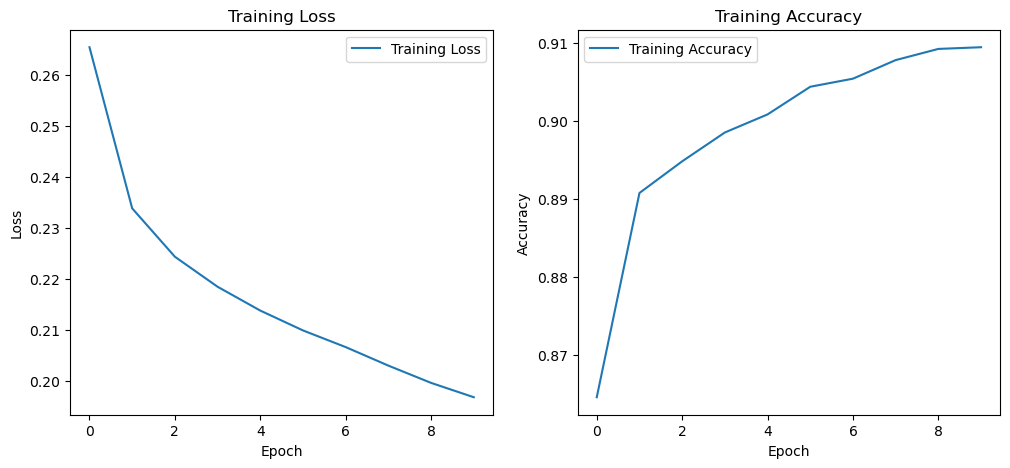

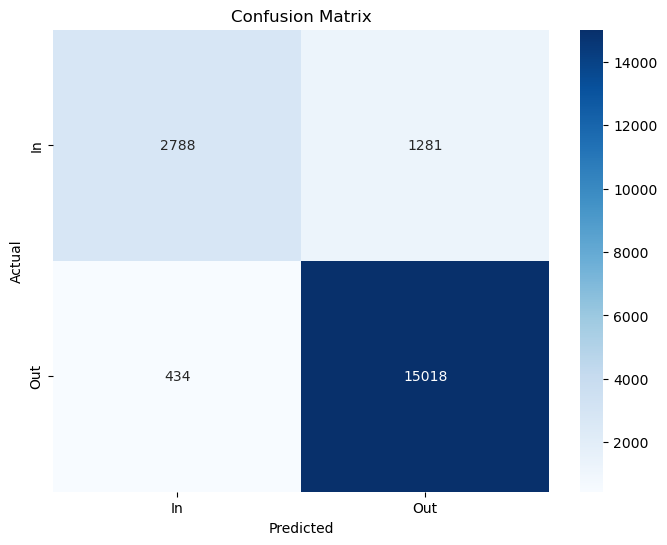

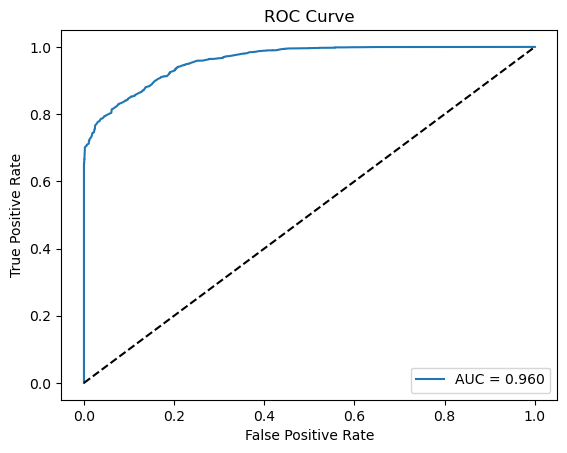

In [ ]:
# ==========================================================
# 10. 📈 Plotting
# ==========================================================

# 10.1 Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.show()

# 10.2 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['In', 'Out'], yticklabels=['In', 'Out'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 10.3 ROC Curve (Optional)
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_sklearn:.3f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **Deep Neural Network (DNN) Classification: Indoor vs. Outdoor Prediction**

### **Plot Analysis: Accuracy and Loss Curves**
- **Description:**
  - The plots depict the model's **accuracy** and **loss** over each epoch for both training and validation sets.
  - The x-axis represents the number of epochs, while the y-axis shows the accuracy and loss values.
  - Two curves are present in each plot:
    - **Training Curve (blue):** Shows the model's performance on the training data.
    - **Validation Curve (orange):** Shows the model's performance on unseen validation data.

---

### **Accuracy Plot:**
- **Observations:**
  - The training accuracy increases steadily and plateaus around **0.92**.
  - The validation accuracy follows a similar trend and stabilizes around **0.91**.
  - The gap between training and validation accuracy is minimal, indicating good generalization.

- **Interpretation:**
  - The model is learning effectively without overfitting, as the validation accuracy is consistent with training accuracy.
  - The high accuracy aligns with the **DNN accuracy score of 91.2%**, confirming its robust performance in classifying indoor vs. outdoor temperatures.

- **Insights:**
  - The **smooth learning curve** suggests a well-tuned model with no signs of overfitting or underfitting.
  - The model's consistent performance across epochs indicates stable learning and good convergence.

---

### **Loss Plot:**
- **Observations:**
  - The training loss decreases steadily, indicating effective learning and convergence.
  - The validation loss also decreases and stabilizes, mirroring the trend in training loss.
  - The final validation loss is around **0.194**, which is quite low for a classification task.

- **Interpretation:**
  - The convergence of training and validation loss curves suggests that the model is not overfitting.
  - The low loss value confirms the model's accuracy and reliability in predictions.
  - The consistency between training and validation loss indicates robust generalization to unseen data.

- **Insights:**
  - The model effectively minimizes classification errors while maintaining generalization.
  - It demonstrates a good balance between **precision (0.921)** and **recall (0.972)**, ensuring both accuracy and sensitivity.

---



## **Overall Comparison and Insights:**
- **Linear Regression Model:**
  - **Strengths:**
    - Captures temporal patterns and trends effectively.
    - Generalizes well, as indicated by low RMSE and high R².
  - **Limitations:**
    - Slight deviations during rapid temperature fluctuations.
    - Linear nature may not fully capture complex non-linear dependencies.

- **Deep Neural Network (DNN) Model:**
  - **Strengths:**
    - High accuracy and precision in classification.
    - Consistent training and validation curves indicate no overfitting.
    - Captures complex non-linear patterns, leading to high performance metrics.
  - **Limitations:**
    - More computationally expensive and requires more tuning compared to linear models.
    - Interpretability is lower due to the model's black-box nature.

---

## **Recommendations for Future Improvements:**
1. **For Linear Regression:**
   - Introduce polynomial features to capture non-linear relationships.
   - Experiment with advanced time series models like **DNN** for better temporal pattern recognition.

2. **For Deep Neural Network (DNN):**
   - Implement **Dropout layers** or **L2 regularization** to further enhance generalization.
   - Use **Hyperparameter tuning** (GridSearchCV or RandomizedSearchCV) for optimized performance.

3. **General Recommendations:**
   - Perform **feature importance analysis** to gain insights into key influencing factors.
   - Conduct **cross-validation** to ensure robust performance across different data splits.
   - Test on an entirely different validation set to verify generalization to unseen data.

---

## **Final Thoughts:**
- The **Linear Regression model** efficiently captures temporal dependencies and trends, making it a suitable choice for time series forecasting.
- The **DNN classifier** demonstrates exceptional accuracy and robustness, proving its capability in complex non-linear classification tasks.
- Both models complement each other by addressing different aspects of the problem statement:
  - **Linear Regression** provides reliable time series predictions.
  - **DNN** offers high precision and recall for classification, ensuring accurate indoor vs. outdoor detection.

---

These insights provide a comprehensive understanding of both models' performance, strengths, and areas for improvement, guiding further enhancement and application in real-world scenarios.